In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#for coordinate in coordinates:
 #   print(coordinate[0], coordinate[1])

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fb468a3f5fa906b026cfdd3bb7524a74


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | andenes
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | tamesis
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | boshnyakovo
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | ilmenau
Processing Record 16 of Set 1 | cabra
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | sandwick
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | kampong thum
Processing Record 21 of Set 1 | san quintin
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of 

Processing Record 37 of Set 4 | waipawa
Processing Record 38 of Set 4 | hovd
Processing Record 39 of Set 4 | finote selam
Processing Record 40 of Set 4 | northam
Processing Record 41 of Set 4 | port hedland
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | taoudenni
Processing Record 44 of Set 4 | mehamn
Processing Record 45 of Set 4 | zanjan
Processing Record 46 of Set 4 | talcahuano
Processing Record 47 of Set 4 | pavilosta
Processing Record 48 of Set 4 | brownsville
Processing Record 49 of Set 4 | atka
City not found. Skipping...
Processing Record 50 of Set 4 | tuktoyaktuk
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | severnyy
Processing Record 4 of Set 5 | muros
Processing Record 5 of Set 5 | jerantut
Processing Record 6 of Set 5 | qaqortoq
Processing Record 7 of Set 5 | cyangugu
Processing Record 8 of Set 5 | viedma
Processing Record 9 of Set 5 | batagay
Processing Record 10 of Set 5 | 

Processing Record 22 of Set 8 | puerto carreno
Processing Record 23 of Set 8 | coihaique
Processing Record 24 of Set 8 | gulariya
Processing Record 25 of Set 8 | natitingou
Processing Record 26 of Set 8 | atasu
Processing Record 27 of Set 8 | dolores
Processing Record 28 of Set 8 | matagami
Processing Record 29 of Set 8 | talakan
Processing Record 30 of Set 8 | khandyga
Processing Record 31 of Set 8 | shitanjing
Processing Record 32 of Set 8 | koungou
Processing Record 33 of Set 8 | jaguaribe
Processing Record 34 of Set 8 | harindanga
Processing Record 35 of Set 8 | lazaro cardenas
Processing Record 36 of Set 8 | eirunepe
Processing Record 37 of Set 8 | vestmannaeyjar
Processing Record 38 of Set 8 | fort nelson
Processing Record 39 of Set 8 | mayumba
Processing Record 40 of Set 8 | conceicao do araguaia
Processing Record 41 of Set 8 | semey
Processing Record 42 of Set 8 | plyussa
Processing Record 43 of Set 8 | urrao
Processing Record 44 of Set 8 | san andres
Processing Record 45 of Se

Processing Record 12 of Set 12 | hirado
Processing Record 13 of Set 12 | arrifes
Processing Record 14 of Set 12 | caruray
Processing Record 15 of Set 12 | kedougou
Processing Record 16 of Set 12 | veselynove
Processing Record 17 of Set 12 | hendijan
City not found. Skipping...
Processing Record 18 of Set 12 | santa fe
Processing Record 19 of Set 12 | vanderhoof
Processing Record 20 of Set 12 | gamba
Processing Record 21 of Set 12 | verkhnyaya inta
Processing Record 22 of Set 12 | tuy hoa
Processing Record 23 of Set 12 | bedele
Processing Record 24 of Set 12 | ituni
City not found. Skipping...
Processing Record 25 of Set 12 | moree
Processing Record 26 of Set 12 | vestmanna
Processing Record 27 of Set 12 | igarka
Processing Record 28 of Set 12 | chumikan
Processing Record 29 of Set 12 | biak
Processing Record 30 of Set 12 | vao
Processing Record 31 of Set 12 | hirara
Processing Record 32 of Set 12 | chagda
City not found. Skipping...
Processing Record 33 of Set 12 | iwanai
Processing Re

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Andenes,69.31,16.12,50.00,66,75,5.82,NO,2020-08-20 15:36:54
1,Kavieng,-2.57,150.80,82.09,78,42,10.02,PG,2020-08-20 15:36:54
2,Saskylakh,71.92,114.08,42.87,63,87,7.96,RU,2020-08-20 15:36:54
3,Mataura,-46.19,168.86,44.01,97,100,1.70,NZ,2020-08-20 15:36:55
4,Albany,42.60,-73.97,73.00,61,8,1.07,US,2020-08-20 15:35:08
5,Tamesis,5.66,-75.71,73.40,64,75,4.70,CO,2020-08-20 15:36:55
6,Qaanaaq,77.48,-69.36,47.39,80,100,11.74,GL,2020-08-20 15:36:55
7,Avarua,-21.21,-159.78,73.40,88,98,21.92,CK,2020-08-20 15:36:56
8,Cidreira,-30.18,-50.21,51.64,64,87,15.70,BR,2020-08-20 15:36:56
9,Boshnyakovo,49.63,142.17,54.01,87,11,4.65,RU,2020-08-20 15:36:56


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Andenes,NO,2020-08-20 15:36:54,69.31,16.12,50.00,66,75,5.82
1,Kavieng,PG,2020-08-20 15:36:54,-2.57,150.80,82.09,78,42,10.02
2,Saskylakh,RU,2020-08-20 15:36:54,71.92,114.08,42.87,63,87,7.96
3,Mataura,NZ,2020-08-20 15:36:55,-46.19,168.86,44.01,97,100,1.70
4,Albany,US,2020-08-20 15:35:08,42.60,-73.97,73.00,61,8,1.07
5,Tamesis,CO,2020-08-20 15:36:55,5.66,-75.71,73.40,64,75,4.70
6,Qaanaaq,GL,2020-08-20 15:36:55,77.48,-69.36,47.39,80,100,11.74
7,Avarua,CK,2020-08-20 15:36:56,-21.21,-159.78,73.40,88,98,21.92
8,Cidreira,BR,2020-08-20 15:36:56,-30.18,-50.21,51.64,64,87,15.70
9,Boshnyakovo,RU,2020-08-20 15:36:56,49.63,142.17,54.01,87,11,4.65


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/20/20'

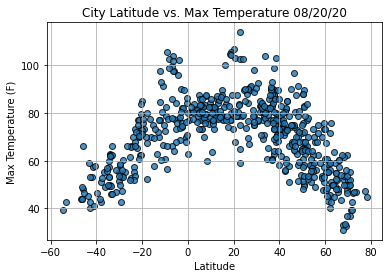

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

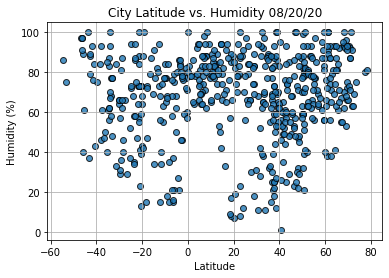

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

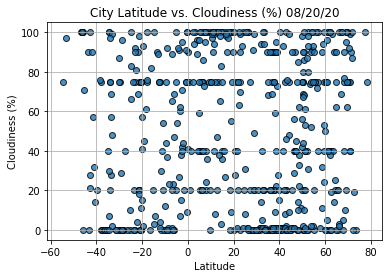

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

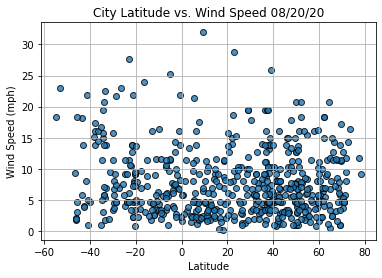

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()